<a href="https://colab.research.google.com/github/kalp121212/DS203_Project/blob/main/Shanghai_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
plt.rcParams['figure.figsize'] = 15,10
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/kalp121212/DS203_Project/main/Datasets/Shanghai/shanghai-world-university-ranking.csv?token=ARGZ7PMUE2E5OBT6ZNWD4ETBTVVY6',
                  sep = ';')

In [4]:
df

,PCP,University,Total score,Alumni,Award,World rank,PUB,National rank,Year,N&S,Hi Ci,World rank integer,Country,Geo Point 2D,Geo Shape,ISO2 CODE,ISO3 CODE
0,27.3,University of Bristol,28.4,7.7,16.8,70,45.3,8,2012,29.6,28.9,70,United Kingdom,"53.9147734806,-2.8531353952","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-5...",GB,GBR
1,17.1,University of Florida,27.9,18.0,0.0,72,60.4,44,2012,20.0,37.4,72,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
2,30.0,Rice University,25.1,17.1,22.4,91,30.6,50,2012,23.9,21.5,91,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
3,22.2,Case Western Reserve University,24.3,32.1,11.2,99,39.3,53,2012,18.7,21.7,99,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
4,33.5,University College London,47.1,27.8,35.8,16,77.0,3,2017,39.6,47.6,16,United Kingdom,"53.9147734806,-2.8531353952","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-5...",GB,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,16.7,The University of Tokushima,NaN,13.4,0.0,401-500,21.5,13-16,2018,6.7,9.6,401,Japan,"37.6631108117,138.064962133","{""type"": ""MultiPolygon"", ""coordinates"": [[[[13...",JP,JPN
7101,14.4,University of Bayreuth,NaN,0.0,0.0,401-500,23.0,27-37,2017,14.1,10.9,401,Germany,"51.1337226904,10.2884850927","{""type"": ""Polygon"", ""coordinates"": [[[9.921906...",DE,DEU
7102,18.8,Tokyo University of Science,NaN,12.4,0.0,401-500,24.4,13-16,2018,5.7,9.6,401,Japan,"37.6631108117,138.064962133","{""type"": ""MultiPolygon"", ""coordinates"": [[[[13...",JP,JPN
7103,18.5,RMIT University,NaN,0.0,0.0,401-500,30.5,22-23,2016,0.0,10.3,401,Australia,"-25.7306547797,134.502775475","{""type"": ""MultiPolygon"", ""coordinates"": [[[[14...",AU,AUS


---
Drop useless columns

In [5]:
df['World rank'] = df['World rank integer']
df = df.drop(columns = ['Geo Shape', 'ISO2 CODE', 'ISO3 CODE', 'World rank integer'])

In [6]:
print(df.info())
pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PCP            7105 non-null   float64
 1   University     7105 non-null   object 
 2   Total score    1403 non-null   float64
 3   Alumni         7105 non-null   float64
 4   Award          7105 non-null   float64
 5   World rank     7105 non-null   int64  
 6   PUB            7105 non-null   float64
 7   National rank  7105 non-null   object 
 8   Year           7105 non-null   int64  
 9   N&S            7082 non-null   float64
 10  Hi Ci          7105 non-null   float64
 11  Country        7100 non-null   object 
 12  Geo Point 2D   7100 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 721.7+ KB
None


Total score is missing for most rows. </br>
Calculate to total score as follows:
<code>**Total score**</code> = (0.1$\times$<code>**Alumni**</code>) + (0.2$\times$<code>**Award**</code>)+(0.2$\times$<code>**Hi Ci**</code>)+(0.2$\times$<code>**N & S**</code>) + (0.2$\times$<code>**PCP**</code>)+(0.1$\times$<code>**PUB**</code>)

In [7]:
# Verify the above formula by checking the RMS difference between calculated and given scores.
df_not_null = df.dropna()
calc_scores = 0.1*df_not_null['Alumni']+0.2*df_not_null['Award']+0.2*df_not_null['Hi Ci']+0.2*df_not_null['N&S']+0.1*df_not_null['PCP']+0.2*df_not_null['PUB']
print((calc_scores-df_not_null['Total score']).std())

0.3688525915950421


In [8]:
df['Total score'] = 0.1*df['Alumni']+0.2*df['Award']+0.2*df['Hi Ci']+0.2*df['N&S']+0.1*df['PCP']+0.2*df['PUB']

In [9]:
# Check number entries and number of incomplete rows by year
df_not_null = df.dropna()
years = list(set(df['Year']))
years.sort()
occs = [[year, sum(df['Year'] == year), sum(df_not_null['Year'] == year)] for year in years]
print(tabulate(occs, headers = ['Year', '# Values', '# NON NA ROWS']))

  Year    # Values    # NON NA ROWS
------  ----------  ---------------
  2005         507              505
  2006         507              505
  2007         518              516
  2008         511              509
  2009         508              506
  2010         508              506
  2011         507              504
  2012         507              506
  2013         505              504
  2014         507              504
  2015         507              504
  2016         506              502
  2017         503              502
  2018         504              504


In [10]:
# Drop rows missing any entries
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7104
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PCP            7077 non-null   float64
 1   University     7077 non-null   object 
 2   Total score    7077 non-null   float64
 3   Alumni         7077 non-null   float64
 4   Award          7077 non-null   float64
 5   World rank     7077 non-null   int64  
 6   PUB            7077 non-null   float64
 7   National rank  7077 non-null   object 
 8   Year           7077 non-null   int64  
 9   N&S            7077 non-null   float64
 10  Hi Ci          7077 non-null   float64
 11  Country        7077 non-null   object 
 12  Geo Point 2D   7077 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 774.0+ KB


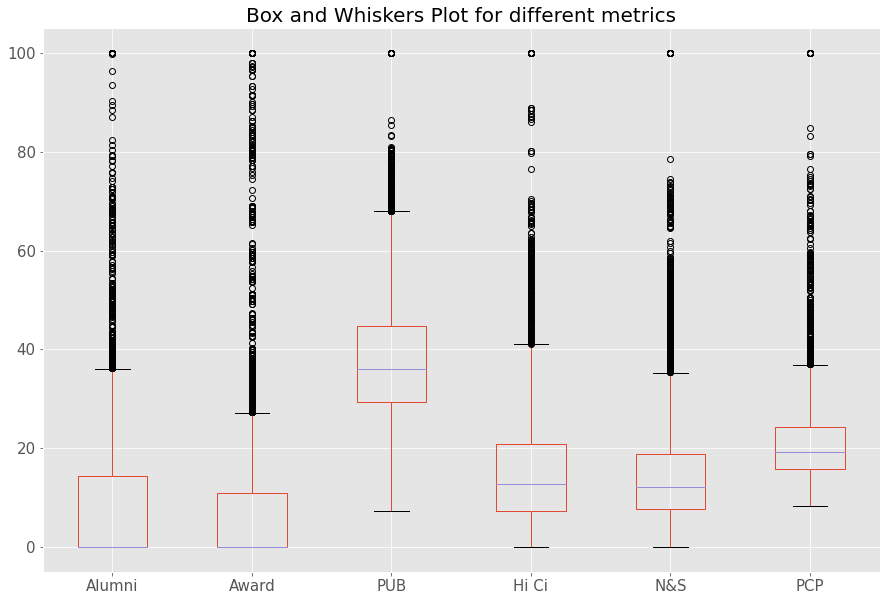

In [11]:
score_metrics = ['Alumni','Award','PUB','Hi Ci','N&S','PCP']
df.boxplot(column = score_metrics, fontsize = 15)
plt.title('Box and Whiskers Plot for different metrics',fontdict={'fontsize':20})
pass

**Observations**


*   The <code>**Alumni**</code> and <code>**Award**</code> metrcs are **terribly skewed** shuch that the scores are almost $0$ for most universities. These account for a total of $\mathbf{30\%}$ of the total scores.
*   <code>**Hi Ci**</code>, <code>**N&S**</code> and <code>**PCP**</code> have nearly identical distribution but are **leftward skewed**. Their combined weightage is $\mathbf{60\%}$.
*   The <code>**PUB**</code> scores are more **judicially distributed**. This contributes to only $\mathbf{10\%}$ of the total scores.



In [17]:
table = [[i, metric, df[metric].std(0), df[metric].mean(), df[metric].median()] for i,metric in enumerate(score_metrics)]
print(tabulate(table, headers = ['No.', 'Score metric', 'Standard Deviation', 'Mean', 'Median'], floatfmt=".2f"))

  No.  Score metric      Standard Deviation    Mean    Median
-----  --------------  --------------------  ------  --------
    0  Alumni                         13.41    8.32      0.00
    1  Award                          14.89    7.01      0.00
    2  PUB                            12.74   38.31     36.10
    3  Hi Ci                          13.80   15.82     12.80
    4  N&S                            12.02   15.28     12.20
    5  PCP                             9.05   21.35     19.30


In [13]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [14]:
!pip install pyproj==1.9.6

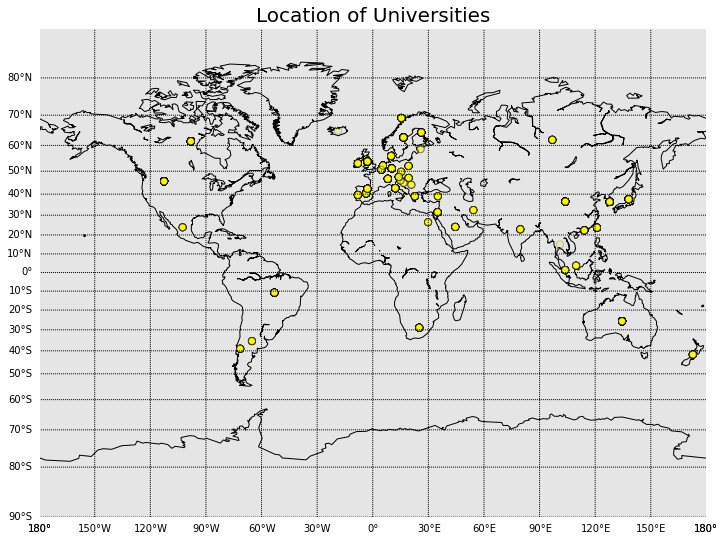

In [15]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

lat_y = [float(coord[coord.index(',')+1:]) for coord in df['Geo Point 2D']]
lon_x = [float(coord[:coord.index(',')])   for coord in df['Geo Point 2D']]

colors = ['yellow']*7077                 #+ ['blue']*3550#, 'yellow', 'red', 'blue', 'orange']

m.scatter(lat_y,lon_x,latlon=True, s=50, c=colors, marker='o', alpha=0.2, edgecolor='k', linewidth=1, zorder=2)
#m.scatter(coords,latlon=True, s=5000, c='blue', marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Location of Universities', fontsize=20)

plt.show()

Observations

*   The Universities are Heavily concentrated in **Europe**.
*   After Europe the concentration is again higher in **Asia** followed by **North America** then **South America**, **Australia** and lastly **Africa**.
*   THe Universities are closer to the coastal regions.


